# Semana 4: Herramientas avanzadas de visualización

### Pregunta 1

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("dataset/diabetes.csv")
data = data.drop(["Outcome"],axis=1)
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [75]:
minimo_age = data['Age'].min()
print(minimo_age)
maximo_age = data['Age'].max()
print(maximo_age)

21
81


In [76]:
df = pd.DataFrame(data['Age'])
bins = pd.cut(df['Age'], bins=6)
print(bins)
df['Age_group'] = pd.cut(df['Age'], bins=6, labels=False) + 1 
df

0       (41.0, 51.0]
1      (20.94, 31.0]
2       (31.0, 41.0]
3      (20.94, 31.0]
4       (31.0, 41.0]
           ...      
763     (61.0, 71.0]
764    (20.94, 31.0]
765    (20.94, 31.0]
766     (41.0, 51.0]
767    (20.94, 31.0]
Name: Age, Length: 768, dtype: category
Categories (6, interval[float64, right]): [(20.94, 31.0] < (31.0, 41.0] < (41.0, 51.0] < (51.0, 61.0] < (61.0, 71.0] < (71.0, 81.0]]


,Age,Age_group
0,50,3
1,31,1
2,32,2
3,21,1
4,33,2
...,...,...
763,63,5
764,27,1
765,30,1
766,47,3


In [77]:
intervalos = {1:'[21, 31]',2:'<31, 41]',3:'<41, 51]',4:'<51, 61]',5:'<61, 71]',6:'<71, 81]'}
df['Age_group'] = df['Age_group'].replace(intervalos)
df_group = df.groupby('Age_group').count()
df_group.columns = ['Cantidad']
print(df_group)

           Cantidad
Age_group          
<31, 41]        155
<41, 51]         99
<51, 61]         48
<61, 71]         23
<71, 81]          2
[21, 31]        441


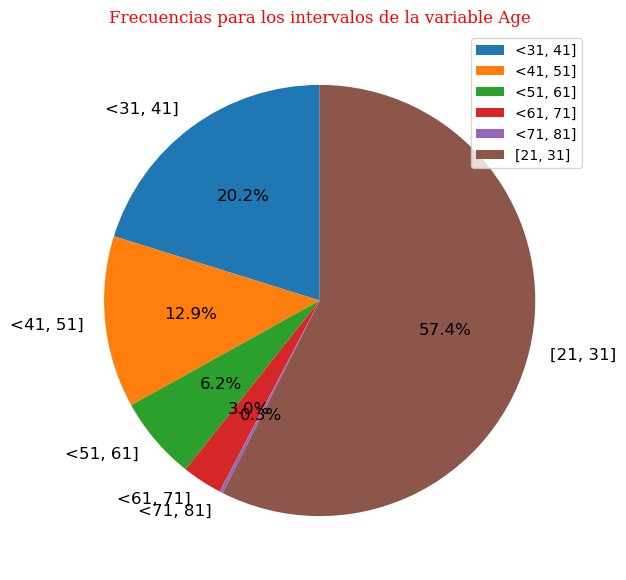

In [78]:
font = {'family': 'serif',
        'color': 'red',
        'weight': 'normal',
        'size': 12,
        }

df_group.plot(kind="pie", y='Cantidad',figsize=(12, 7), autopct='%1.1f%%', 
        textprops={"fontsize" : 12}, startangle=90)
plt.title('Frecuencias para los intervalos de la variable Age', fontdict=font)
plt.legend(loc="upper right")
plt.ylabel("")
plt.savefig("pie")
plt.show()

### Pregunta 2

In [79]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [80]:
variables = ['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']
df = data[variables]
df

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction
0,6,148,0,33.6,0.627
1,1,85,0,26.6,0.351
2,8,183,0,23.3,0.672
3,1,89,94,28.1,0.167
4,0,137,168,43.1,2.288
...,...,...,...,...,...
763,10,101,180,32.9,0.171
764,2,122,0,36.8,0.340
765,5,121,112,26.2,0.245
766,1,126,0,30.1,0.349


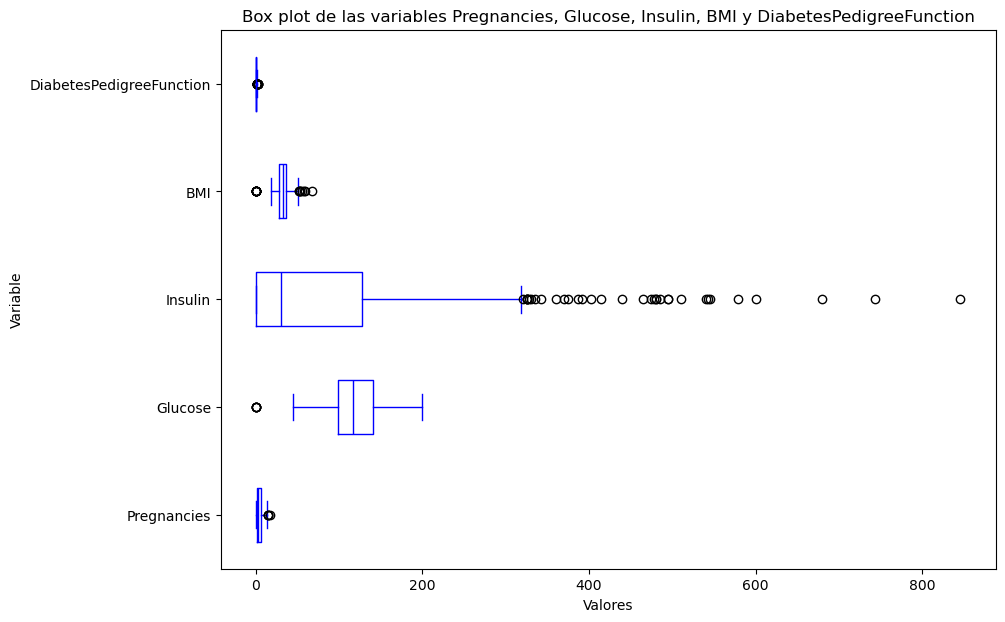

In [81]:
df.plot(kind="box", figsize=(10, 7), color='blue', vert=False)
plt.title('Box plot de las variables Pregnancies, Glucose, Insulin, BMI y DiabetesPedigreeFunction')
plt.ylabel('Variable')
plt.xlabel('Valores')
plt.savefig("boxplot")
plt.show()

In [82]:
def get_outliers(colname):
    # Obtener los cuartiles
    Q1 = df[colname].quantile(0.25)
    Q3 = df[colname].quantile(0.75)
    IQR = Q3 - Q1
    lower_threshold = Q1 - 1.5 * IQR
    upper_threshold = Q3 + 1.5 * IQR
    outliers = df[(df[colname] < lower_threshold) | (df[colname] > upper_threshold)]
    return outliers    

print("------------------------")
print("Valores atípicos Pregnancies =", get_outliers('Pregnancies'))
print("------------------------")
print("Valores atípicos Glucose =", get_outliers('Glucose'))
print("------------------------")
print("Valores atípicos Insulin =", get_outliers('Insulin'))
print("------------------------")
print("Valores atípicos BMI =", get_outliers('BMI'))
print("------------------------")
print("Valores atípicos DiabetesPedigreeFunction =", get_outliers('DiabetesPedigreeFunction'))

------------------------
Valores atípicos Pregnancies =      Pregnancies  Glucose  Insulin   BMI  DiabetesPedigreeFunction
88            15      136      110  37.1                     0.153
159           17      163      114  40.9                     0.817
298           14      100      184  36.6                     0.412
455           14      175        0  33.6                     0.212
------------------------
Valores atípicos Glucose =      Pregnancies  Glucose  Insulin   BMI  DiabetesPedigreeFunction
75             1        0        0  24.7                     0.140
182            1        0       23  27.7                     0.299
342            1        0        0  32.0                     0.389
349            5        0        0  41.0                     0.346
502            6        0        0  39.0                     0.727
------------------------
Valores atípicos Insulin =      Pregnancies  Glucose  Insulin   BMI  DiabetesPedigreeFunction
8              2      197      543  

### Pregunta 3

In [83]:
data = pd.read_csv("dataset/diabetes.csv")
data = data.drop(["Outcome"],axis=1)
df = data[['BloodPressure','SkinThickness']]

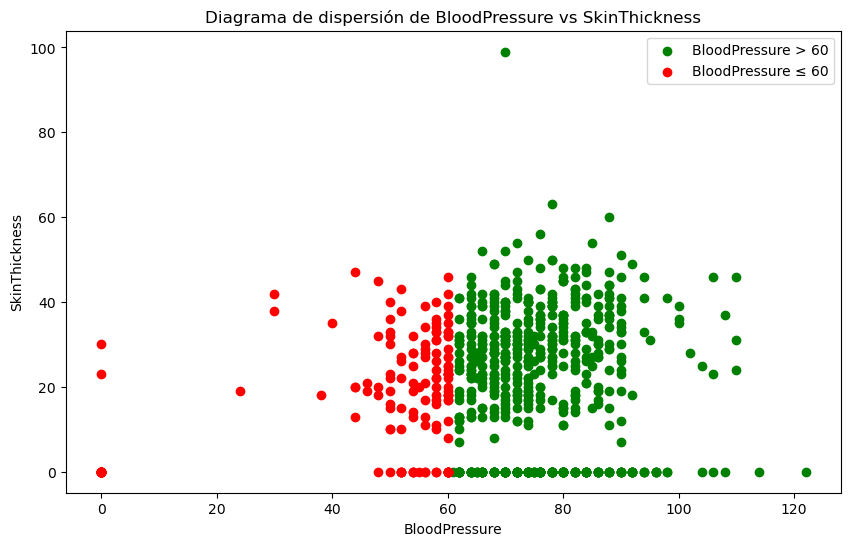

In [84]:
plt.figure(figsize=(10, 6))

bp_greater_60 = df[df['BloodPressure'] > 60]
plt.scatter(bp_greater_60['BloodPressure'], bp_greater_60['SkinThickness'], 
            color='green', label='BloodPressure > 60')

bp_less_equal_60 = df[df['BloodPressure'] <= 60]
plt.scatter(bp_less_equal_60['BloodPressure'], bp_less_equal_60['SkinThickness'], 
            color='red', label='BloodPressure ≤ 60')

plt.xlabel('BloodPressure')
plt.ylabel('SkinThickness')
plt.title('Diagrama de dispersión de BloodPressure vs SkinThickness')
plt.legend()
plt.show()

### Pregunta 4

In [85]:
data = pd.read_csv("dataset/diabetes.csv")
data = data.drop(["Outcome"],axis=1)

In [86]:
import seaborn as sns
df = pd.DataFrame(data['Age'])
bins = pd.cut(df['Age'], bins=6)
print(bins)
df['Age_group'] = pd.cut(df['Age'], bins=6, labels=False) + 1 
intervalos = {1:'[21, 31]',2:'<31, 41]',3:'<41, 51]',4:'<51, 61]',5:'<61, 71]',6:'<71, 81]'}
df['Age_group'] = df['Age_group'].replace(intervalos)
df

0       (41.0, 51.0]
1      (20.94, 31.0]
2       (31.0, 41.0]
3      (20.94, 31.0]
4       (31.0, 41.0]
           ...      
763     (61.0, 71.0]
764    (20.94, 31.0]
765    (20.94, 31.0]
766     (41.0, 51.0]
767    (20.94, 31.0]
Name: Age, Length: 768, dtype: category
Categories (6, interval[float64, right]): [(20.94, 31.0] < (31.0, 41.0] < (41.0, 51.0] < (51.0, 61.0] < (61.0, 71.0] < (71.0, 81.0]]


,Age,Age_group
0,50,"<41, 51]"
1,31,"[21, 31]"
2,32,"<31, 41]"
3,21,"[21, 31]"
4,33,"<31, 41]"
...,...,...
763,63,"<61, 71]"
764,27,"[21, 31]"
765,30,"[21, 31]"
766,47,"<41, 51]"


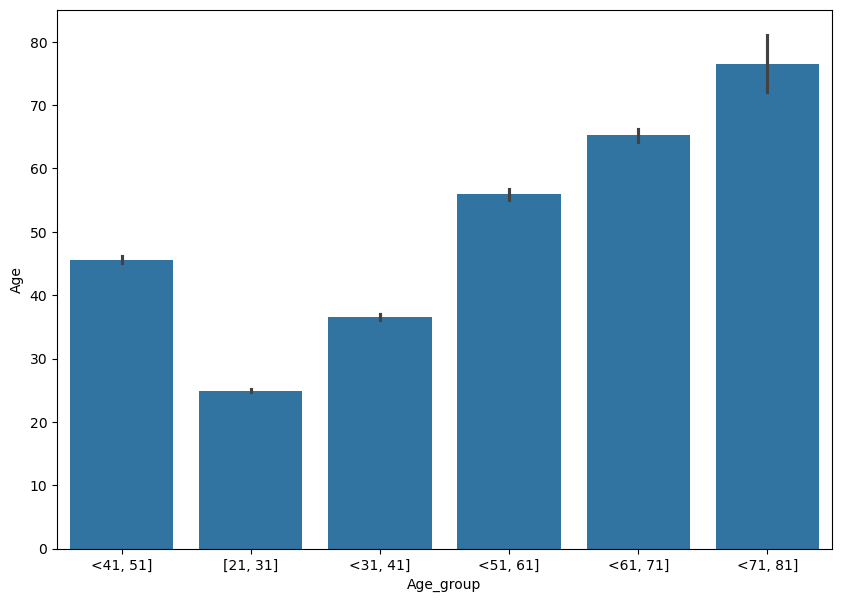

In [87]:
plt.figure(figsize=(10, 7))
sns.barplot(x='Age_group', y='Age', data=df)
plt.show()

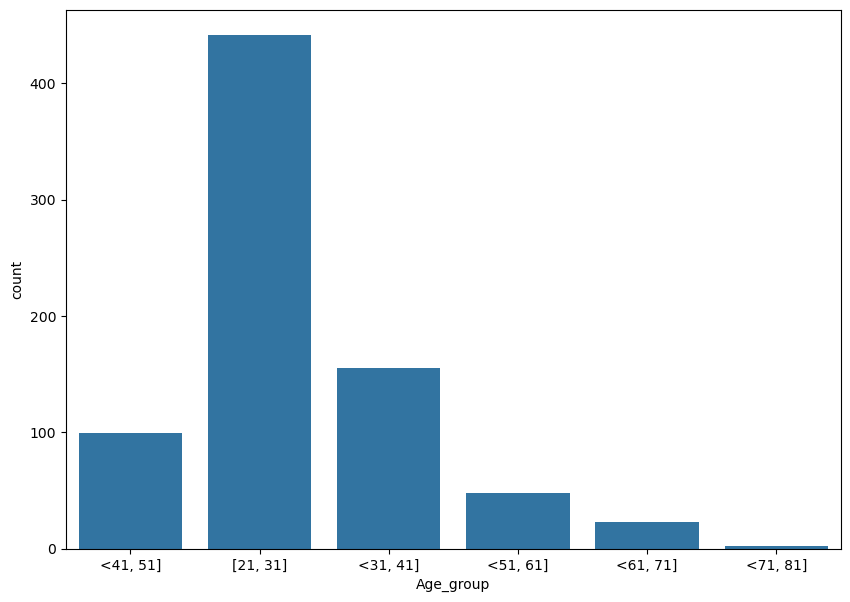

In [88]:
plt.figure(figsize=(10, 7))
sns.countplot(x='Age_group', data=df)
plt.show()

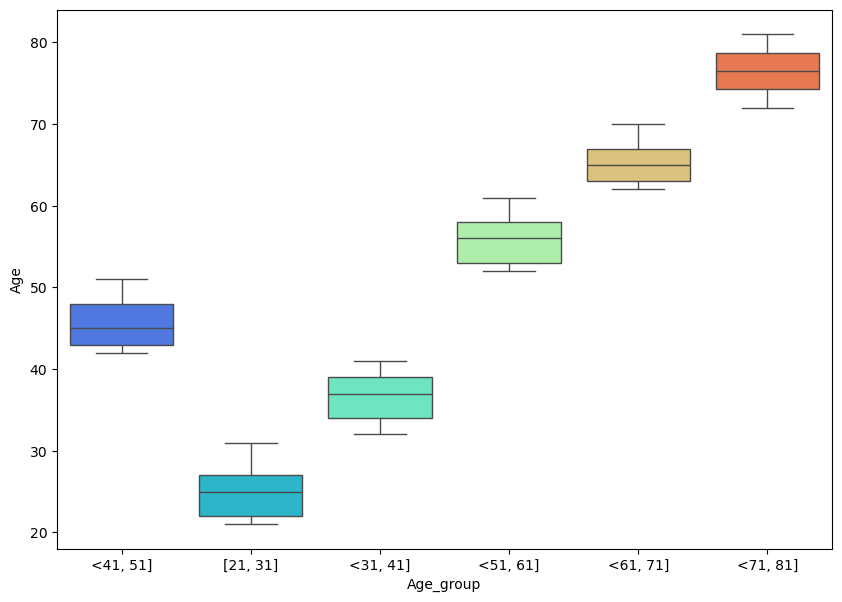

In [89]:
plt.figure(figsize=(10, 7))
sns.boxplot(x="Age_group", y="Age", data=df,hue="Age_group",palette='rainbow', legend=False)
plt.show()

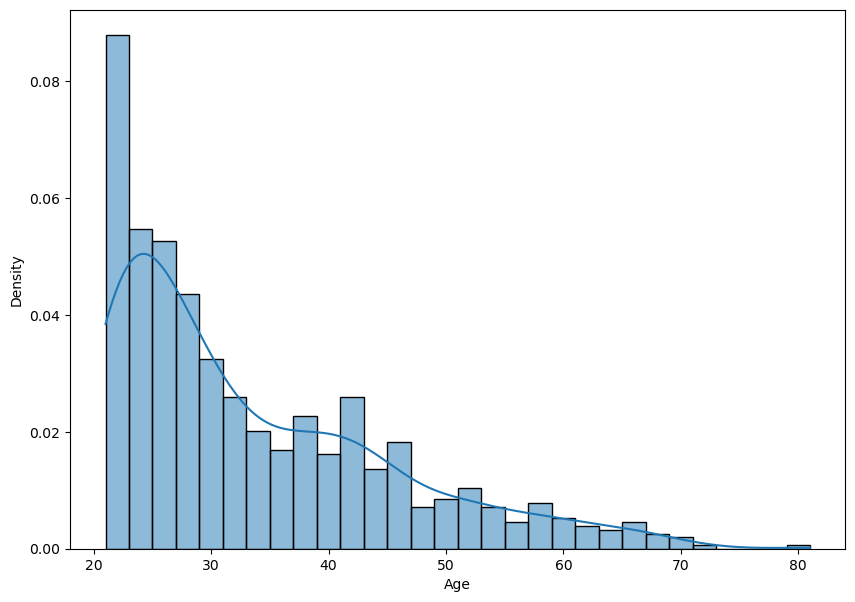

In [90]:
plt.figure(figsize=(10, 7))
sns.histplot(df['Age'], bins=30, kde=True, stat="density")
plt.show()